# Who is the Gooedest Boy?


## Sponsored By
![WeRateDogs](https://cdn.shopify.com/s/files/1/1352/9125/files/wrd_logo_website-200h_540x.png?v=1599580382)


Using an archive of WeRateDogs, I was able to find some info on which dog names get the best ratings. I do want to note that most dogs in this dataset are unnamed or in groups and so a larger dataset with more names will produce better results

### The Dataset:

First, let's read the dataset. We will need to the Pandas library for this

In [1]:
import pandas as pd

With pandas imported, we can read the master file I created. You can also find how I did this <a href="http://localhost:8888/lab/tree/Downloads/Data%20Wrangling%20Udacity/wrangle_act.ipynb"> here</a>. 
<!-- this is a fake link that in a real setting would link do warngle.act ––>

In [2]:
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,jpg_url,num_images,first_guess,...,first_img_isdog,second_guess,second_guess_confidence,second_img_isdog,third_guess,third_guess_confidence,third_img_isdog,retweet_count,favorite_count,type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,7121,34282,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,5364,29720,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,3530,22369,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7316,37440,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7870,35765,NaN


In [3]:
df_master.shape

(1886, 21)

### Structure

This dataset contains 18 columns describing 1977 tweets. Many of the columns are self explanatory but there is section with columns like `first_guess` et cetera. These relate to a larger project that <a href="http://localhost:8888/lab/tree/Downloads/Data%20Wrangling%20Udacity/wrangle_act.html" onclick="return false;"> DogeAI</a> and I will be working on in the coming weeks. Hit that subscribe button if you would like to see more! <!-- this is a fake link that in a real setting would link do wrangle.act ––>

### Finding Charlie

The next few lines of code are going to get us information about the mean numerator for dogs named Charlie. I'll compare them to the whole dataset and a few other dogs with similar numbers in the population. As stated earlier, the most common 'name' for dogs is none and this blog will likely be featured in a future update with deeper analysis.

In [4]:
#Find the mean rating of the dataset

doggo_mean = df_master['rating_out_of_10'].mean()
doggo_mean

10.869565217391305

In [5]:
#Dogs are averaging a ~10.6 in the rating system, because they are good dogs Brent.
#How does Charlie hold up?

charlie = df_master['rating_out_of_10'][df_master['name'] == 'Charlie'].mean()
charlie

11.6

In [6]:
#Charlie is doing a heckin good boy and beating the average by a whole point!
#how do other dogs compare? Let's look for similar sized dog groups


#note that None will be the largest value by far
df_master['name'].value_counts(sort=True).nlargest(15)

Oliver     10
Cooper     10
Charlie    10
Lucy        9
Tucker      9
Penny       9
Sadie       8
Winston     8
Daisy       7
Lola        7
Toby        7
Bo          6
Stanley     6
Jax         6
Koda        6
Name: name, dtype: int64

In [7]:
#let's compare to Oliver, Penny and Sadie
oliver = df_master['rating_out_of_10'][df_master['name'] == 'Cooper'].mean()
oliver

11.3

In [8]:
penny = df_master['rating_out_of_10'][df_master['name'] == 'Penny'].mean()
penny

10.666666666666666

In [9]:
sadie = df_master['rating_out_of_10'][df_master['name'] == 'Sadie'].mean()
sadie

10.25

Charlie scores higher than the 3 other groups! Let's visualize this using matplotlib and a histogram with all the values.

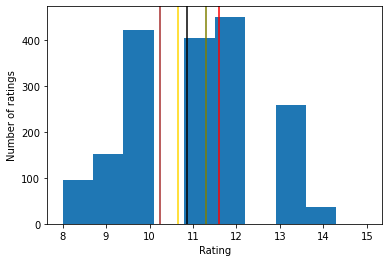

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(x=df_master['rating_out_of_10'], label='Histogram of Rating Values', range=[8,15], align='mid', histtype='stepfilled')
plt.axvline(x=doggo_mean, color='black')
plt.axvline(x=charlie, color='r')
plt.axvline(x=sadie, color='brown')
plt.axvline(x=penny, color='gold')
plt.axvline(x=oliver, color='olive')
plt.xlabel("Rating")

plt.ylabel("Number of ratings");



This seems to state that if you want a good rating from our friends at WRD, sending them Charlie is a good idea!


# Bonus Round: Getting Ratioed

On the social media platform Twitter, a ratio, or getting ratioed, is when replies to a tweet vastly outnumber likes or retweets. This means people are objecting to the tweet and considering its content bad. Do you think an account like WeRateDogs is likely to get ratioed if people do not like it's rating system, like <b>Brent</b>?

Let's check it out with a simple linear regression

In [11]:
import statsmodels.api as sm

X = df_master['favorite_count']
Y = df_master['retweet_count']

mod = sm.OLS(X, Y)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         favorite_count   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.559e+04
Date:                Fri, 31 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:59:13   Log-Likelihood:                         -18611.
No. Observations:                1886   AIC:                                  3.722e+04
Df Residuals:                    1885   BIC:                                  3.723e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
retweet_count     2.8097      0.023    124.867      0.000       2.766       2.854
==============================================================================
Omnibus:                      865.610   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57826.435
Skew:                          -1.309   Prob(JB):                         0.00
Kurtosis:                      30.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is most important in the above model is the `R-squared (uncentered)` which is 0.892. Having a value this high means that WeRateDogs is making content that is NOT ratioed

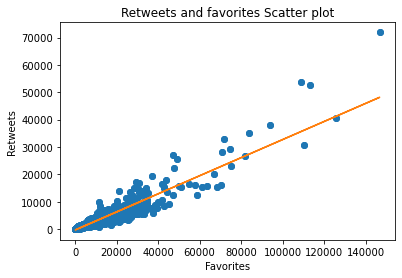

In [12]:
# The below chart is the visual display of the retweet/favorite count linear regression
import numpy as np

plt.scatter(df_master['favorite_count'], df_master['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

x = np.array(df_master['favorite_count'])
y = np.array(df_master['retweet_count'])

plt.plot(x, y, 'o', label="Regression Line")

m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b);

Thank you! Make sure to clap, comment and hit that subscribe and we will see you next with with more info!

In [13]:
import os

os.system('jupyter nbconvert --to html act_report.ipynb')

[NbConvertApp] Converting notebook act_report.ipynb to html
[NbConvertApp] Writing 616882 bytes to act_report.html


0